For the largest number of bootstrap samples (6400):
Simple bias estimate: 0.0073605655620272575
Resample bias estimate: 0.007708823916368332


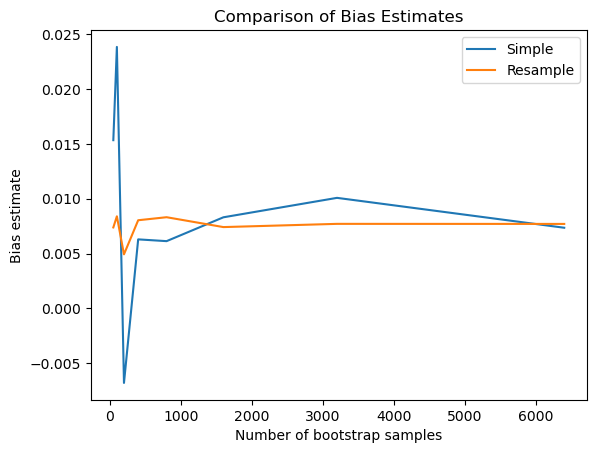

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Initial data
Z = np.array([ 8406, 2342, 8187, 8459, 4795, 3516, 4796, 10238 ])
Y = np.array([ -1200, 2601, -2705, 1982, -1290, 351, -638, -2719 ])
N = len(Z)
theta_est = np.mean(Y) / np.mean(Z)
indices = np.arange(N)

# List of numbers of bootstrap samples to try
B_values = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# Lists to store bias estimates
bias_simple_list = []
bias_resample_list = []

for B in B_values:
    bootstrap_samples = []
    resampling_vectors = []

    for _ in range(B):
        bootstrap_indices = np.random.choice(indices, size=N)
        sample_Z = Z[bootstrap_indices]
        sample_Y = Y[bootstrap_indices]

        bootstrap_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
        bootstrap_samples.append(bootstrap_theta_est)

        # Compute the resampling vector
        resampling_vector = [np.count_nonzero(bootstrap_indices == i) for i in indices]
        resampling_vector = np.array(resampling_vector) / N
        resampling_vectors.append(resampling_vector)

    bootstrap_samples = np.array(bootstrap_samples)
    resampling_vectors = np.array(resampling_vectors)

    # Calculate the mean resampling vector
    mean_resample_vec = np.mean(resampling_vectors, axis=0)

    # Compute simple bias estimate and store it
    bias_simple = np.mean(bootstrap_samples) - theta_est
    bias_simple_list.append(bias_simple)

    # Compute bias estimate using mean of resampling vector and store it
    theta_star = np.average(Y, weights=mean_resample_vec) / np.average(Z, weights=mean_resample_vec)
    bias_resample = np.mean(bootstrap_samples) - theta_star
    bias_resample_list.append(bias_resample)

# Print the bias estimates from the largest number of bootstrap samples
print(f'For the largest number of bootstrap samples ({B_values[-1]}):')
print(f'Simple bias estimate: {bias_simple_list[-1]}')
print(f'Resample bias estimate: {bias_resample_list[-1]}')

# Plot the bias estimates
plt.plot(B_values, bias_simple_list, label='Simple')
plt.plot(B_values, bias_resample_list, label='Resample')
plt.xlabel('Number of bootstrap samples')
plt.ylabel('Bias estimate')
plt.legend(loc='upper right')
plt.title('Comparison of Bias Estimates')
plt.show()
